# 🚜 Using ML To Predict The Prize Of Bulldozers!

## Problem Defination
Predicting the auction sales prize of a bulldozer based on the previous prizes that a particular bulldozer was sold for.
## Data
> The Data for this taken from :- https://www.kaggle.com/competitions/bluebook-for-bulldozers/data
* Train.csv is the training set, which contains data through the end of 2011.
* Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.
* Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.
## Evaluation
The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.
For more infromation, check this link out:- https://www.kaggle.com/competitions/bluebook-for-bulldozers/overview/evaluation
## Features
Kaggle provides a DataDictionary.xlsx which can be found in Data/DataDictionary.xlsx

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Importing the training and validation set
df = pd.read_csv('data/TrainAndValid.csv', low_memory=False, parse_dates=['saledate'])

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   412698 non-null  int64         
 1   SalePrice                 412698 non-null  float64       
 2   MachineID                 412698 non-null  int64         
 3   ModelID                   412698 non-null  int64         
 4   datasource                412698 non-null  int64         
 5   auctioneerID              392562 non-null  float64       
 6   YearMade                  412698 non-null  int64         
 7   MachineHoursCurrentMeter  147504 non-null  float64       
 8   UsageBand                 73670 non-null   object        
 9   saledate                  412698 non-null  datetime64[ns]
 10  fiModelDesc               412698 non-null  object        
 11  fiBaseModel               412698 non-null  object        
 12  fi

In [5]:
df['saledate'][:1000]

0     2006-11-16
1     2004-03-26
2     2004-02-26
3     2011-05-19
4     2009-07-23
         ...    
995   2009-07-16
996   2007-06-14
997   2005-09-22
998   2005-07-28
999   2011-06-16
Name: saledate, Length: 1000, dtype: datetime64[ns]

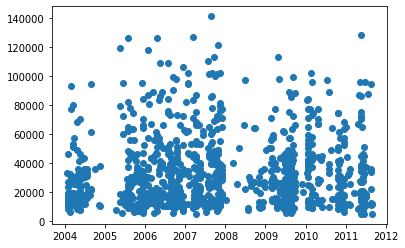

In [8]:
fig, ax = plt.subplots()
ax.scatter(df['saledate'][:1000], df['SalePrice'][:1000])

In [9]:
# Sorting the dataframe by date - to get a better look at the data
df.sort_values(by=["saledate"], ascending=True, inplace=True)
df['saledate'].head(20)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
113394   1989-01-31
116419   1989-01-31
32138    1989-01-31
127610   1989-01-31
76171    1989-01-31
127000   1989-01-31
128130   1989-01-31
127626   1989-01-31
55455    1989-01-31
55454    1989-01-31
Name: saledate, dtype: datetime64[ns]

In [11]:
df.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


In [12]:
df_tmp = df.copy()

In [13]:
df_tmp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


### Feature Engineering

In [14]:
# Extracting all the years, dates, days and months

df_tmp['saledate'].head(20)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
113394   1989-01-31
116419   1989-01-31
32138    1989-01-31
127610   1989-01-31
76171    1989-01-31
127000   1989-01-31
128130   1989-01-31
127626   1989-01-31
55455    1989-01-31
55454    1989-01-31
Name: saledate, dtype: datetime64[ns]

In [16]:
df_tmp['saleYear'] = df_tmp['saledate'].dt.year
df_tmp['saleMonth'] = df_tmp['saledate'].dt.month
df_tmp['saleDay'] = df_tmp['saledate'].dt.day
df_tmp['saleDayOfWeek'] = df_tmp['saledate'].dt.dayofweek
df_tmp['saleDayOfYear'] = df_tmp['saledate'].dt.dayofyear

In [17]:
df_tmp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


In [18]:
df_tmp.drop('saledate', axis=1, inplace=True)

In [25]:
# Checking out the columns with string data types
str_cols = []
for label, content in df_tmp.items():
    if(pd.api.types.is_string_dtype(content)):
        str_cols.append(label)

str_cols

['UsageBand',
 'fiModelDesc',
 'fiBaseModel',
 'fiSecondaryDesc',
 'fiModelSeries',
 'fiModelDescriptor',
 'ProductSize',
 'fiProductClassDesc',
 'state',
 'ProductGroup',
 'ProductGroupDesc',
 'Drive_System',
 'Enclosure',
 'Forks',
 'Pad_Type',
 'Ride_Control',
 'Stick',
 'Transmission',
 'Turbocharged',
 'Blade_Extension',
 'Blade_Width',
 'Enclosure_Type',
 'Engine_Horsepower',
 'Hydraulics',
 'Pushblock',
 'Ripper',
 'Scarifier',
 'Tip_Control',
 'Tire_Size',
 'Coupler',
 'Coupler_System',
 'Grouser_Tracks',
 'Hydraulics_Flow',
 'Track_Type',
 'Undercarriage_Pad_Width',
 'Stick_Length',
 'Thumb',
 'Pattern_Changer',
 'Grouser_Type',
 'Backhoe_Mounting',
 'Blade_Type',
 'Travel_Controls',
 'Differential_Type',
 'Steering_Controls']

In [26]:
# changing the string columns into categorical data
for label, content in df_tmp.items():
    if(pd.api.types.is_string_dtype(content)):
        df_tmp[label] = content.astype("category").cat.as_ordered()

In [28]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor       

In [30]:
df_tmp['UsageBand'].cat.codes

205615   -1
274835   -1
141296   -1
212552   -1
62755    -1
         ..
410879   -1
412476   -1
411927   -1
407124   -1
409203   -1
Length: 412698, dtype: int8

In [32]:
df_tmp['UsageBand'].value_counts()

Medium    35832
Low       25311
High      12527
Name: UsageBand, dtype: int64

In [34]:
# Exporting the preprocessed data

df_tmp.to_csv("data/train_preproc.csv")

In [2]:
# Import the pre-processed data

df_tmp = pd.read_csv('data/train_preproc.csv', low_memory=False)

In [3]:
df_tmp.isna().sum()/len(df_tmp) * 100

Unnamed: 0                   0.000000
SalesID                      0.000000
SalePrice                    0.000000
MachineID                    0.000000
ModelID                      0.000000
datasource                   0.000000
auctioneerID                 4.879113
YearMade                     0.000000
MachineHoursCurrentMeter    64.258610
UsageBand                   82.149174
fiModelDesc                  0.000000
fiBaseModel                  0.000000
fiSecondaryDesc             34.099269
fiModelSeries               85.784520
fiModelDescriptor           81.871490
ProductSize                 52.485110
fiProductClassDesc           0.000000
state                        0.000000
ProductGroup                 0.000000
ProductGroupDesc             0.000000
Drive_System                74.051970
Enclosure                    0.080931
Forks                       52.092087
Pad_Type                    80.349796
Ride_Control                62.992794
Stick                       80.349796
Transmission

## Filling the Missing Values 

### Fill the numeric missing values first.

In [4]:
for label, content in df_tmp.items():
    if(pd.api.types.is_numeric_dtype(content)):
        print(label)

Unnamed: 0
SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth
saleDay
saleDayOfWeek
saleDayOfYear


In [41]:
df_tmp['ModelID']

0          8434
1         10150
2          4139
3          8591
4          4089
          ...  
412693     5266
412694    19330
412695    17244
412696     3357
412697     4701
Name: ModelID, Length: 412698, dtype: int64

In [5]:
# Checking for which numeric columns have numeric values

for label, content in df_tmp.items():
    if(pd.api.types.is_numeric_dtype(content)):
        if(pd.isnull(content).sum()):
            print(label)

auctioneerID
MachineHoursCurrentMeter


In [6]:
# Fill the numeric rows with the median

for label, content in df_tmp.items():
    if(pd.api.types.is_numeric_dtype(content)):
        if(pd.isnull(content).sum()):
            # Adding an indication wether the row had null or not
            df_tmp[label+"_is_missing"] = pd.isnull(content)
            # Filling the missing value with the median
            df_tmp[label] = content.fillna(content.median())

In [7]:
# Checking how many values were missing
df_tmp['auctioneerID_is_missing'].value_counts()

False    392562
True      20136
Name: auctioneerID_is_missing, dtype: int64

In [55]:
df_tmp['MachineHoursCurrentMeter_is_missing'].value_counts()

True     265194
False    147504
Name: MachineHoursCurrentMeter_is_missing, dtype: int64

In [57]:
# Checking how many other null values remain

df_tmp.isnull().sum()

Unnamed: 0                                  0
SalesID                                     0
SalePrice                                   0
MachineID                                   0
ModelID                                     0
datasource                                  0
auctioneerID                                0
YearMade                                    0
MachineHoursCurrentMeter                    0
UsageBand                              339028
fiModelDesc                                 0
fiBaseModel                                 0
fiSecondaryDesc                        140727
fiModelSeries                          354031
fiModelDescriptor                      337882
ProductSize                            216605
fiProductClassDesc                          0
state                                       0
ProductGroup                                0
ProductGroupDesc                            0
Drive_System                           305611
Enclosure                         

In [58]:
# Check for columns which aren't numeric

for label, content in df_tmp.items():
    if(not pd.api.types.is_numeric_dtype(content)):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [7]:
# Converting the not numeric columns into Categorical data and adding + 1

for label, content in df_tmp.items():
    if(not pd.api.types.is_numeric_dtype(content)):
        # Creating a binary column for the columns which had missing values
        df_tmp[label+"_is_missing"] = pd.isnull(content)
        # Adding a +1 to categorical data. This is done because pd automatically assigns -1 to all the null values. We don't need that. Hence, we add +1 to all the codes to make the -ve (null) values to be 0
        df_tmp[label] = pd.Categorical(content).codes + 1

In [60]:
df_tmp.isnull().sum()

Unnamed: 0                      0
SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 104, dtype: int64

### Fitting the model

In [63]:
len(df_tmp)

412698

In [64]:
%%time

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_jobs=-1, random_state=38)

model.fit(df_tmp.drop('SalePrice', axis=1), df_tmp['SalePrice'])

CPU times: total: 56min 43s
Wall time: 4min 16s


RandomForestRegressor(n_jobs=-1, random_state=38)

## Splitting the data into training and validation set

In [8]:
df_train = df_tmp[df_tmp['saleYear'] != 2012]
df_val = df_tmp[df_tmp['saleYear'] == 2012]

In [9]:
# splitting the data further into X and y

X_train, y_train = df_train.drop('SalePrice', axis=1), df_train['SalePrice']
X_valid, y_valid = df_val.drop('SalePrice', axis=1), df_val['SalePrice']

## Building a custom evaluation function

In [10]:
from sklearn.metrics import mean_absolute_error, mean_squared_log_error, r2_score

def evaluate(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)

    scores = {
        "Training MAE": mean_absolute_error(y_train, train_preds),
        "Validation MAE": mean_absolute_error(y_valid, val_preds),
        "Training RMSLE": np.sqrt(mean_squared_log_error(y_train, train_preds)),
        "Validation RMSLE": np.sqrt(mean_squared_log_error(y_valid, val_preds)),
        "Training R^2 Score": r2_score(y_train, train_preds),
        "Validation R^2 Score": r2_score(y_valid, val_preds)
    }

    return scores

### Testing the model but with a limited amount of samples using `max_samples`

In [70]:
%%time

model = RandomForestRegressor(n_jobs=-1, random_state=38, max_samples=10000)

model.fit(X_train, y_train)

CPU times: total: 1min 27s
Wall time: 6.87 s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=38)

In [71]:
# Calling our custom function to display how well the model has performed

evaluate(model)

{'Training MAE': 5561.844082343408,
 'Validation MAE': 7285.22254817247,
 'Training RMSLE': 0.257916902975205,
 'Validation RMSLE': 0.30042146189158553,
 'Training R^2 Score': 0.860450839473894,
 'Validation R^2 Score': 0.8288770401068077}

In [11]:
from sklearn.ensemble import RandomForestRegressor

In [12]:
# Tuning hyperparameters now

from sklearn.model_selection import RandomizedSearchCV

rs_grid = {
    "n_estimators": np.arange(10, 100, 10),
    "max_depth": [None, 3, 5, 10],
    "min_samples_split": np.arange(2, 20, 2),
    "min_samples_leaf": np.arange(1, 20, 2),
    "max_features": [0.5, 1, 'sqrt', 'auto'],
    "max_samples": [10000]
}

rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1, random_state=38),
                                param_distributions=rs_grid,
                                n_iter=2,
                                cv=5,
                                verbose=True)

rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


c:\Users\MSI\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
c:\Users\MSI\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
c:\Users\MSI\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_feat

RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=38),
                   n_iter=2,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [13]:
evaluate(rs_model)

{'Training MAE': 6692.495783874441,
 'Validation MAE': 8081.760169609648,
 'Training RMSLE': 0.29916784551373987,
 'Validation RMSLE': 0.32437542333025965,
 'Training R^2 Score': 0.8041253103503553,
 'Validation R^2 Score': 0.7835017830461328}

#### Training a model with best hyperparameters.

In [14]:
ideal_model = RandomForestRegressor(
    n_estimators=40,
    min_samples_leaf=1,
    min_samples_split=14,
    max_features=0.5,
    n_jobs=-1,
    max_samples=None
)

ideal_model.fit(X_train, y_train)

RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=-1)

In [16]:
evaluate(ideal_model)

{'Training MAE': 2943.3690726850527,
 'Validation MAE': 6085.106060768294,
 'Training RMSLE': 0.14406271393090153,
 'Validation RMSLE': 0.2548319201596942,
 'Training R^2 Score': 0.9591767598922752,
 'Validation R^2 Score': 0.8789487055750574}

### Making Submission to Kaggle

In [27]:
test_df = pd.read_csv('data/Test.csv', low_memory=False, parse_dates=['saledate'])
test_df

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12452,6643171,2558317,21450,149,2,2008,NaN,NaN,2012-10-24,80NX3,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
12453,6643173,2558332,21434,149,2,2005,NaN,NaN,2012-10-24,28N,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
12454,6643184,2558342,21437,149,2,1000,NaN,NaN,2012-10-24,35N,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
12455,6643186,2558343,21437,149,2,2006,NaN,NaN,2012-10-24,35N,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN


In [20]:
test_df['saledate'].dtype

dtype('<M8[ns]')

#### Preprocessing the data

In [28]:
def preprocess_data(df_tmp):
    df_tmp['saleYear'] = df_tmp['saledate'].dt.year
    df_tmp['saleMonth'] = df_tmp['saledate'].dt.month
    df_tmp['saleDay'] = df_tmp['saledate'].dt.day
    df_tmp['saleDayOfWeek'] = df_tmp['saledate'].dt.dayofweek
    df_tmp['saleDayOfYear'] = df_tmp['saledate'].dt.dayofyear
    df_tmp.drop('saledate', axis=1, inplace=True)
    # changing the string columns into categorical data
    for label, content in df_tmp.items():
        if(pd.api.types.is_string_dtype(content)):
            df_tmp[label] = content.astype("category").cat.as_ordered()
    for label, content in df_tmp.items():
        if(pd.api.types.is_numeric_dtype(content)):
            if(pd.isnull(content).sum()):
                # Adding an indication wether the row had null or not
                df_tmp[label+"_is_missing"] = pd.isnull(content)
                # Filling the missing value with the median
                df_tmp[label] = content.fillna(content.median())
                
    # Converting the not numeric columns into Categorical data and adding + 1
    for label, content in df_tmp.items():
        if(not pd.api.types.is_numeric_dtype(content)):
            # Creating a binary column for the columns which had missing values
            df_tmp[label+"_is_missing"] = pd.isnull(content)
            # Adding a +1 to categorical data. This is done because pd automatically assigns -1 to all the null values. We don't need that. Hence, we add +1 to all the codes to make the -ve (null) values to be 0
            df_tmp[label] = pd.Categorical(content).codes + 1


In [29]:
preprocess_data(test_df)
test_df.head().T

,0,1,2,3,4
SalesID,1227829,1227844,1227847,1227848,1227863
MachineID,1006309,1022817,1031560,56204,1053887
ModelID,3168,7271,22805,1269,22312
datasource,121,121,121,121,121
auctioneerID,3,3,3,3,3
...,...,...,...,...,...
Backhoe_Mounting_is_missing,True,True,True,True,False
Blade_Type_is_missing,True,True,True,True,False
Travel_Controls_is_missing,True,True,True,True,False
Differential_Type_is_missing,True,False,True,True,True


In [31]:
test_df.to_csv('data/processed_test.csv', index=False)

In [32]:
test_df = pd.read_csv('data/processed_test.csv')
test_df.head().T

,0,1,2,3,4
SalesID,1227829,1227844,1227847,1227848,1227863
MachineID,1006309,1022817,1031560,56204,1053887
ModelID,3168,7271,22805,1269,22312
datasource,121,121,121,121,121
auctioneerID,3,3,3,3,3
...,...,...,...,...,...
Backhoe_Mounting_is_missing,True,True,True,True,False
Blade_Type_is_missing,True,True,True,True,False
Travel_Controls_is_missing,True,True,True,True,False
Differential_Type_is_missing,True,False,True,True,True


In [33]:
test_df.isna().sum()

SalesID                         0
MachineID                       0
ModelID                         0
datasource                      0
auctioneerID                    0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 101, dtype: int64

In [34]:
# 1 missing column 
set(X_train) - set(test_df)

{'Unnamed: 0', 'auctioneerID_is_missing'}

In [45]:
X_train['Unnamed: 0'].value_counts()

205615    1
318613    1
341308    1
328966    1
349773    1
         ..
217804    1
133380    1
31741     1
101530    1
393123    1
Name: Unnamed: 0, Length: 401125, dtype: int64

In [35]:
test_df['auctioneerID_is_missing'] = False

In [38]:
test_df['auctioneerID_is_missing'].value_counts()

False    12457
Name: auctioneerID_is_missing, dtype: int64

#### Correcting my mistakes

In [48]:
tv_df = pd.read_csv('data/TrainAndValid.csv', low_memory=False, parse_dates=['saledate'])
tv_df

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412693,6333344,10000.0,1919201,21435,149,2.0,2005,NaN,NaN,2012-03-07,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
412694,6333345,10500.0,1882122,21436,149,2.0,2005,NaN,NaN,2012-01-28,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
412695,6333347,12500.0,1944213,21435,149,2.0,2005,NaN,NaN,2012-01-28,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
412696,6333348,10000.0,1794518,21435,149,2.0,2006,NaN,NaN,2012-03-07,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN


In [49]:
preprocess_data(tv_df)

In [50]:
set(tv_df) - set(test_df)

{'SalePrice'}

In [61]:
df_train = tv_df[df_tmp['saleYear'] != 2012]
df_val = tv_df[df_tmp['saleYear'] == 2012]

In [62]:
X_train, y_train = tv_df.drop('SalePrice', axis=1), tv_df['SalePrice']

In [63]:
set(X_train) - set(test_df)

set()

In [64]:
set(df_train) - set(test_df)

{'SalePrice'}

In [65]:
set(df_val) - set(test_df)

{'SalePrice'}

In [66]:
ideal_model = RandomForestRegressor(
    n_estimators=40,
    min_samples_leaf=1,
    min_samples_split=14,
    max_features=0.5,
    n_jobs=-1,
    max_samples=None
)

In [67]:
ideal_model.fit(X_train, y_train)

RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=-1)

In [69]:
test_preds = ideal_model.predict(test_df)

c:\Users\MSI\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [70]:
test_preds

array([18785.80010493, 18227.50364931, 46654.64835147, ...,
       13640.09658384, 18677.94582476, 30807.58035325])